# Bagging, Boosting & Voting based ensemble techniques for classsification

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/payutech/EnsembleTechnique/master/cancer2.csv')

In [4]:
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
print(data.shape)
data.isnull().sum()

(699, 11)


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [16]:
#check numerical value, Bare Nuclei is not numerical now
#need to make some changes 
data.applymap(np.isreal)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
694,True,True,True,True,True,True,False,True,True,True,True
695,True,True,True,True,True,True,False,True,True,True,True
696,True,True,True,True,True,True,False,True,True,True,True
697,True,True,True,True,True,True,False,True,True,True,True


In [19]:
data.loc[data['Bare Nuclei']=='?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


(array([402.,   0., 132.,   0.,  30.,   0.,  19.,   0.,  28.,   0.,   9.,
          0.,   8.,   0.,  16.,   0.,  30.,   0.,  21.,   4.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <a list of 20 Patch objects>)

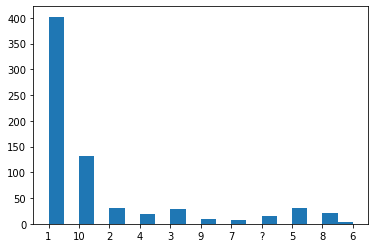

In [22]:
#we have unknown 'bare nuclei', need to impute the missing value
#before we proceed to next 
plt.hist(data['Bare Nuclei'], bins=20)

In [23]:
#based on the mode, we will replace ? by 1
data['Bare Nuclei']=data['Bare Nuclei'].replace(['?'], 1)

In [24]:
data.loc[data['Bare Nuclei']=='?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [25]:
#? is replaced now, let's check numerical
data.applymap(np.isreal)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
694,True,True,True,True,True,True,False,True,True,True,True
695,True,True,True,True,True,True,False,True,True,True,True
696,True,True,True,True,True,True,False,True,True,True,True
697,True,True,True,True,True,True,False,True,True,True,True


In [26]:
#we still need to transform 'Bare Nuclei to numerical'
data['Bare Nuclei']=data['Bare Nuclei'].astype(int)

In [27]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [28]:
X=data.drop(columns=['ID', 'Class'])
y=data[['Class']]


In [29]:
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

## Voting Classifier

In [30]:
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()

In [31]:
voting_clf=VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [32]:
voting_clf.fit(X_train, y_train)

/Users/seline/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [33]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

/Users/seline/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-33-e46e0173627f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


LogisticRegression 0.9571428571428572
RandomForestClassifier 0.9642857142857143


/Users/seline/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/seline/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC 0.9714285714285714
VotingClassifier 0.9714285714285714


It seems like SVM and Voting give the same results. So voting find the best classifier from the three.

In [39]:
voting_clf2=VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

#soft voting 
y_pred=voting_clf2.predict(X_test)
voting_clf2.fit(X_train, y_train)
accuracy_score(y_test,y_pred)

NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Bagging
- use the same training algorithms for everypredictor and train them on different random subsets of the training set.

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

In [46]:
bag_clf.fit(X_train, y_train)

/Users/seline/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [47]:
y_pred=bag_clf.predict(X_test)

In [48]:
accuracy_score(y_pred, y_test)

0.9642857142857143

In [52]:
from sklearn.ensemble import RandomForestClassifier
rdf_clf=RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                   n_jobs=-1)
rdf_clf.fit(X_train, y_train)
y_pred_rf=rnd_clf.predict(X_test)

<ipython-input-52-73d64cb70d24>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdf_clf.fit(X_train, y_train)


In [54]:
accuracy_score(y_pred_rf, y_test)

0.9714285714285714

Random forest has higher accuracy compare to bagging. I have previously using Random forest when compare to voting algorithm, not sure why it gives different accuracy score.